## Spring 7: Haciendo preguntas

Usaremos los datos de deporte anteriores para realizar algun ejemplo.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [37]:
archivos=list()
for i in range(31):
    archivos.append("SP1("+str(i)+").csv")
print(archivos)

['SP1(0).csv', 'SP1(1).csv', 'SP1(2).csv', 'SP1(3).csv', 'SP1(4).csv', 'SP1(5).csv', 'SP1(6).csv', 'SP1(7).csv', 'SP1(8).csv', 'SP1(9).csv', 'SP1(10).csv', 'SP1(11).csv', 'SP1(12).csv', 'SP1(13).csv', 'SP1(14).csv', 'SP1(15).csv', 'SP1(16).csv', 'SP1(17).csv', 'SP1(18).csv', 'SP1(19).csv', 'SP1(20).csv', 'SP1(21).csv', 'SP1(22).csv', 'SP1(23).csv', 'SP1(24).csv', 'SP1(25).csv', 'SP1(26).csv', 'SP1(27).csv', 'SP1(28).csv', 'SP1(29).csv', 'SP1(30).csv']


In [38]:
datos_liga=pd.read_csv("./datos/"+archivos[0])

In [39]:
for i in range(1,25):
    temp=pd.read_csv("./datos/"+archivos[i])
    datos_liga=datos_liga.append(temp,ignore_index=True)

Bien , todo lo mismo que en anteriores capitulos. Empezemos directamente con una cuestión y veamos como plantearla.¿existe el efecto campo?

H0: _"Jugar como local no tiene efecto en el resultado"_  
H1: _"Jugar como local tiene un efecto en el resultado"_

#### Seleccionando datos

Como venimos haciendo nos olvidamos de toda la sección de apuestas , no nos interesan ni fechas ni horarios, y solo tenemos interés por los resultados finales. con todo ello crearemos un nuevo DataFrame con los campos que nos sean útiles para determinar la validez de la hipótesis.

Creamos dataframe con los campos que nos interesan y cambiamos en nombre de las columnas

In [40]:
datos_hipotesis=datos_liga[["FTHG","FTAG"]]
datos_hipotesis=datos_hipotesis.rename(columns={"FTHG":"Goles Local","FTAG":"Goles visitante"})

Después creamos dos arrays: el primero con los resultados de las diferencias entre los goles locales menos visitantes , es decir , en positivo cuando gana el local y en negativo cuando gana el visitante.El segundo con la suma de goles totales por partido.

In [41]:
dif_goles=[datos_hipotesis["Goles Local"]-datos_hipotesis["Goles visitante"]]

In [42]:
total_gol=[datos_hipotesis["Goles Local"]+datos_hipotesis["Goles visitante"]]

In [43]:
datos_hipotesis.describe

<bound method NDFrame.describe of       Goles Local  Goles visitante
0               1                0
1               1                1
2               1                1
3               1                4
4               0                0
...           ...              ...
9495            5                2
9496            1                1
9497            1                0
9498            4                1
9499            3                1

[9500 rows x 2 columns]>

Miramos la correlación entre los goles totales y la diferencia de goles con los goles de los equipos cuando son visitante y local.

In [44]:
print("Coeficiente relación entre diferencia de goles y goles del equipo local : "+str(np.corrcoef(dif_goles,datos_hipotesis["Goles Local"])[0,1]))

Coeficiente relación entre diferencia de goles y goles del equipo local : 0.7811973033873628


In [45]:
print("Coeficiente relación entre diferencia de goles y goles del equipo visitante : "+str(np.corrcoef(dif_goles,datos_hipotesis["Goles visitante"])[0,1]))

Coeficiente relación entre diferencia de goles y goles del equipo visitante : -0.675901285134082


In [46]:
print("Coeficiente relación entre los goles totales y goles del equipo local : "+str(np.corrcoef(total_gol,datos_hipotesis["Goles Local"])[0,1]))

Coeficiente relación entre los goles totales y goles del equipo local : 0.7445130354363688


In [47]:
print("Coeficiente relación entre los goles totales y goles del equipo visitante : "+str(np.corrcoef(total_gol,datos_hipotesis["Goles visitante"])[0,1]))

Coeficiente relación entre los goles totales y goles del equipo visitante : 0.6154991834105717


## Discusión:
El coeficiente de relación entre la diferencia de goles vs goles visitantes tiene sentido ya que al hacer la diferencia de goles entre los locales y visitantes , los resultados que favorecen al visitante estan en negativo. En el hecho de los coeficientes de correlación sean ligeramente mejor para los goles del equipo local vs los goles del equipo visitante , nos podría dar indicios de que la hipótesis H1 tiene una pequeña parte de razón . PERO se podría objetar varios problemas en el tratamiento que hemos hecho de los datos , principalmente nos centraríamos en 2 aspectos:

    1-Las variables de incremeto de goles/goles totales no són independientes de los campos goles local/visitante.
    2-La normalidad de los datos de goles no son demasiado buenas.

Estos aspectos van en contra de los requerimientos para el uso del coeficieciente de correlación de Pearson.Por lo tanto quedan en duda cualquier conclusión que se pueda sacar de ellos, aunque si miramos la distribución del histograma de la diferencia de goles , observamos de forma cualittiva que esta ligeramente desplazada en la parte postiva , lo que podría corroborar la hipotesis H1.

(array([   8.,   48.,  110., 1009., 1518., 4444., 1881.,  308.,  157.,
          17.]),
 array([-8. , -6.4, -4.8, -3.2, -1.6,  0. ,  1.6,  3.2,  4.8,  6.4,  8. ]),
 <BarContainer object of 10 artists>)

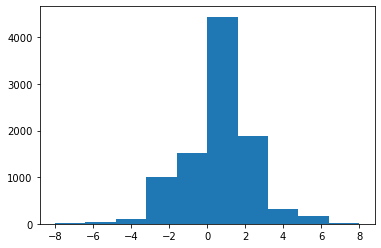

In [48]:

plt.hist(dif_goles)

## Comenzando de nuevo
Miremos los datos a ver si encontramos unos datos de calidad para sacar algunas conclusiones.Empezemos haciendo una nueva cuestión :¿Corners , útiles o inútiles?

H0 _"Los corners no influyen en el resultado"_
H1 _"Los corners influyen en el resultado"_

Empezamos volviendo a crear un dataframe con los datos que nos puedan ser utiles. En este caso , usaremos los sumatorios de los campos y no diferenciaremos entre local y visitante , ya que nuestra pregunta se basa en la relación en general y no en otros efectos que puedan tener relación con si el equipo es local/visitante.


In [49]:
datos_hipotesis=datos_liga[["FTHG","FTAG","HS","AS","HC","AC"]]

In [50]:
datos_hipotesis["Goles"]=datos_hipotesis["FTHG"]+datos_hipotesis["FTAG"]
datos_hipotesis["chutes"]=datos_hipotesis["HS"]+datos_hipotesis["AS"]
datos_hipotesis["corners"]=datos_hipotesis["HC"]+datos_hipotesis["AC"]
datos_hipotesis["chutes_centrados"]=datos_liga["HST"]+datos_liga["AST"]
datos_hipotesis["faltas"]=datos_liga["HF"]+datos_liga["AF"]

C:\Users\anton\AppData\Local\Temp/ipykernel_124/2430578025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_hipotesis["Goles"]=datos_hipotesis["FTHG"]+datos_hipotesis["FTAG"]
C:\Users\anton\AppData\Local\Temp/ipykernel_124/2430578025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_hipotesis["chutes"]=datos_hipotesis["HS"]+datos_hipotesis["AS"]
C:\Users\anton\AppData\Local\Temp/ipykernel_124/2430578025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Veamos de forma rápida los histogramas de los datos de las columnas _"corners"_ y _"chutes"_ :

(array([  48.,  324., 1779., 2102., 2162., 2033.,  623.,  355.,   62.,
          12.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

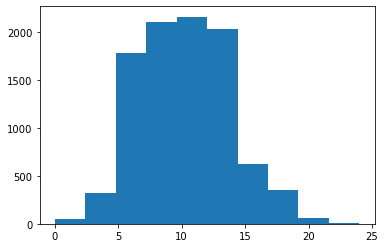

In [51]:
plt.hist(datos_hipotesis["corners"])

(array([  17.,  284., 1657., 2399., 2999., 1489.,  442.,  176.,   31.,
           6.]),
 array([ 5. ,  9.7, 14.4, 19.1, 23.8, 28.5, 33.2, 37.9, 42.6, 47.3, 52. ]),
 <BarContainer object of 10 artists>)

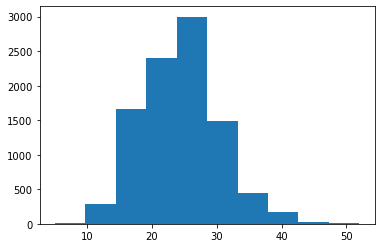

In [52]:
plt.hist(datos_hipotesis["chutes"])

Si los miramos con cariño , podemos aceptar cierta normalidad en los datos. 

In [53]:
print("Coeficiente relación entre goles y chutes totales : "+str(np.corrcoef(datos_hipotesis["Goles"],datos_hipotesis["chutes"])[0,1]))

Coeficiente relación entre goles y chutes totales : 0.2880977230012344


In [54]:
print("Coeficiente relación entre  goles y corners : "+str(np.corrcoef(datos_hipotesis["Goles"],datos_hipotesis["corners"])[0,1]))

Coeficiente relación entre  goles y corners : -0.013610167817115826


In [55]:
print("Coeficiente relación entre diferencia de goles y chutes a porteria : "+str(np.corrcoef(datos_hipotesis["Goles"],datos_hipotesis["chutes_centrados"])[0,1]))

Coeficiente relación entre diferencia de goles y chutes a porteria : 0.5586954200216486


In [56]:
print("Coeficiente relación entre corners y chutes a porteria : "+str(np.corrcoef(datos_hipotesis["corners"],datos_hipotesis["chutes_centrados"])[0,1]))

Coeficiente relación entre corners y chutes a porteria : 0.18036360108680335


## Discusión 2:
En este caso , asumiremos la normalidad de los datos y que sean variables independientes.Se ha puesto también la correlación entre los chutes totales/chutes a porteria para ver la diferencia de comportamiento frente a la misma variable.
Respecto a la correlación entre chutes y goles , observamos que la aparentemente hay una relación entre el número de chutes vs los goles y que esta se ve acentuada si los goles van a porteria :p.
Ahora si nos centramos en nuestra hipótesis, podemos observar que la relación entre corners y goles es aparentemente inexistente, es decir que la hipótesis H1 es rechazada en favor de H0. Por lo tanto podemos decir que hay indicios que los corners no suponen una situación de peligro para el equipo contrario. 
Este resultado podría ser interpretado por el hecho de que ser el corner una situación a balón parado , con unas condiciones muy específicas , pueden ser estudiadas por los equipos de forma minuciosa. En los tiempos actuales con la profesionalización , la posibilidad de estudiar las técnicas de los rivales , datos , estadísticos etc.. resulta difícil que los corners sean oportunidades de gol , al menos a nivel profesional.
Ademas si observamos la correlación entre los corner y los chutes a porteria , vemos una relación débil , lo cual nos refuerza las conclusiones anteriores.Hay cierta relación positiva, es decir puede propiciar cierto peligro de gol, pero no resulta un factor demasiado importante o decisivo para marcar .